In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


%matplotlib inline
sns.set(style="whitegrid")

In [5]:
df = pd.read_csv('../data/train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
data = df.copy()

In [8]:
data = data.drop(['Name','Ticket','Cabin','PassengerId'], axis=1)

In [9]:
data['Age'] = data['Age'].fillna(data['Age'].median())

In [10]:
data['Embarked'] = data['Embarked'].fillna(data['Embarked'].mode()[0])

In [11]:
data['Sex'] = data['Sex'].map({'male':0,'female':1})
data = pd.get_dummies(data, columns=['Embarked'], drop_first=True)

In [12]:
features = ['Pclass','Sex','Age','SibSp','Parch','Fare','Embarked_Q','Embarked_S']
X = data[features]
y = data['Survived']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [14]:
model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,200
,multi_class,'deprecated'


In [15]:
preds = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, preds))
print("Confusion Matrix:\n", confusion_matrix(y_test, preds))
print("Classification Report:\n", classification_report(y_test, preds))

Accuracy: 0.8044692737430168
Confusion Matrix:
 [[98 12]
 [23 46]]
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.89      0.85       110
           1       0.79      0.67      0.72        69

    accuracy                           0.80       179
   macro avg       0.80      0.78      0.79       179
weighted avg       0.80      0.80      0.80       179



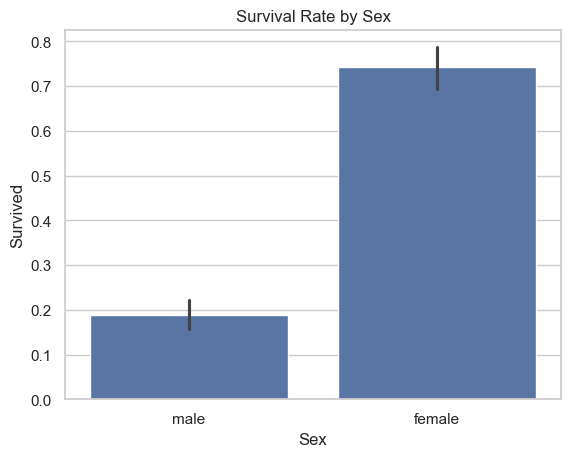

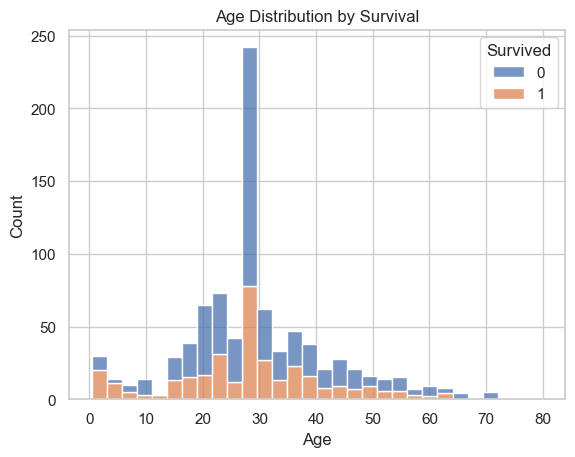

In [18]:
sns.barplot(x='Sex', y='Survived', data=data.replace({'Sex':{0:'male',1:'female'}}))
plt.title('Survival Rate by Sex')
plt.show()


sns.histplot(data=data, x='Age', hue='Survived', multiple='stack', bins=30)
plt.title('Age Distribution by Survival')
plt.show()

In [21]:
%%bash
!git add .
git commit -m "Titanic EDA and Model"
git branch -M main
git remote add origin https://github.com/yourusername/titanic-portfolio.git
git push -u origin main

bash: line 1: !git: command not found
fatal: not a git repository (or any of the parent directories): .git
fatal: not a git repository (or any of the parent directories): .git
fatal: not a git repository (or any of the parent directories): .git
fatal: not a git repository (or any of the parent directories): .git


CalledProcessError: Command 'b'!git add .\ngit commit -m "Titanic EDA and Model"\ngit branch -M main\ngit remote add origin https://github.com/yourusername/titanic-portfolio.git\ngit push -u origin main\n'' returned non-zero exit status 128.